# Smoke Detection data cleaning and feature selection

##### Statement: except the correlation heat map, Q-Q plot and OLS statistics are used from example, all other codes are done by myself

### Data Set
The data set consists of :
1. 14  characteristics of the situation that smoke detection at i.e.  - The independent variables
2. The condition of fire alarm - The dependent variable  
3. The condition of fire alarm is represented by 0 and 1..
4. There are a total of 62631 observations. 

### The meaning of every features
UTC - The time when experiment was performed.
<br>Temperature - Temperature of Surroundings. Measured in Celsius
<br>Humidity - The air humidity during the experiment.
<br>TVOC - Total Volatile Organic Compounds. Measured in ppb (parts per billion)
<br>eCo2 - CO2 equivalent concentration. Measured in ppm (parts per million)
<br>Raw H2 - The amount of Raw Hydrogen present in the surroundings.
<br>Raw Ethanol - The amount of Raw Ethanol present in the surroundings.
<br>Pressure - Air pressure. Measured in hPa
<br>PM1.0 - Paticulate matter of diameter less than 1.0 micrometer .
<br>PM2.5 - Paticulate matter of diameter less than 2.5 micrometer.
<br>NC0.5 - Concentration of particulate matter of diameter less than 0.5 micrometers.
<br>NC1.0 - Concentration of particulate matter of diameter less than 1.0 micrometers.
<br>NC2.5 - Concentration of particulate matter of diameter less than 2.5 micrometers.
<br>CNT - Simple Count.
<br>Fire Alarm - (Reality) If fire was present then value is 1 else it is 0.

<br>Dropping fields
<br>UTC - Just a timestamp
<br>CNT - Stores the count

In [ ]:
!pip install xgboost

In [ ]:
# for outlier preprocessing 
pip install datasist

In [109]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier

In [658]:
#Reading dataset
data = pd.read_csv("C:\\Users\\85251\\Desktop\\6105\\a1\\smoke_detection_iot.csv", index_col=0)

In [659]:
data.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [660]:
# UTC is timestamp, and CNT is count number, no need to use
data.drop(columns = ['UTC','CNT'],inplace = True)

In [661]:
#checking if the any data is missing
data.isnull().sum()

Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
Fire Alarm        0
dtype: int64

No data is missing from any of the columns

<Figure size 576x360 with 0 Axes>

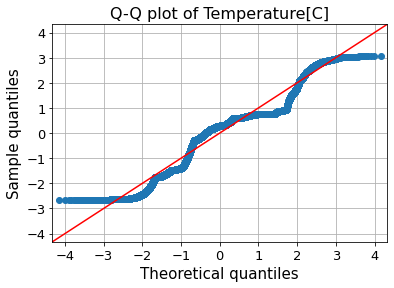

<Figure size 576x360 with 0 Axes>

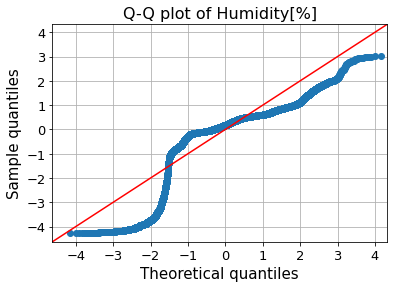

<Figure size 576x360 with 0 Axes>

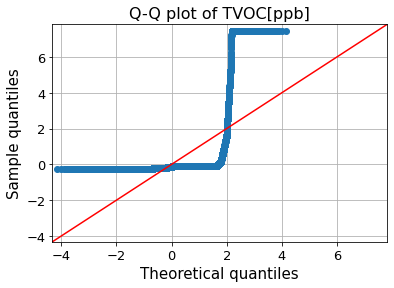

<Figure size 576x360 with 0 Axes>

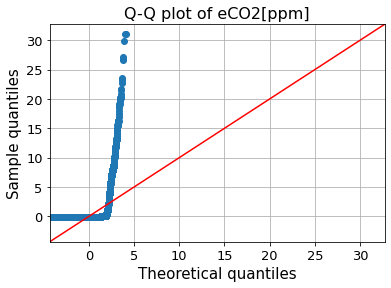

<Figure size 576x360 with 0 Axes>

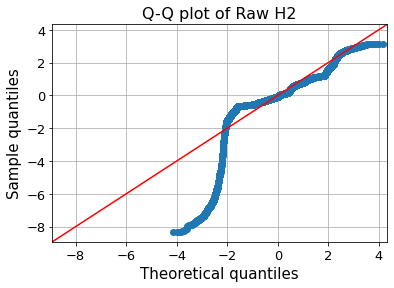

<Figure size 576x360 with 0 Axes>

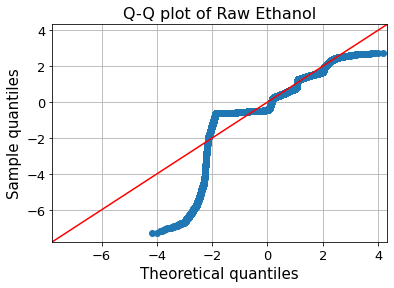

<Figure size 576x360 with 0 Axes>

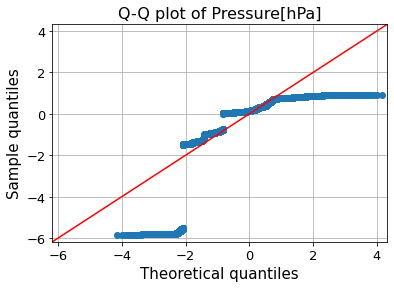

<Figure size 576x360 with 0 Axes>

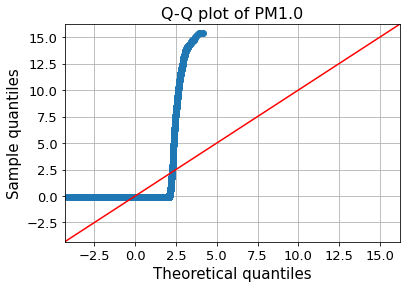

<Figure size 576x360 with 0 Axes>

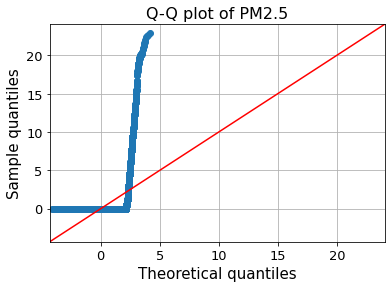

<Figure size 576x360 with 0 Axes>

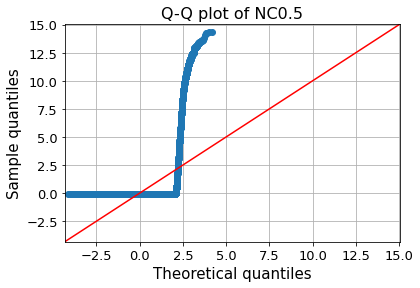

<Figure size 576x360 with 0 Axes>

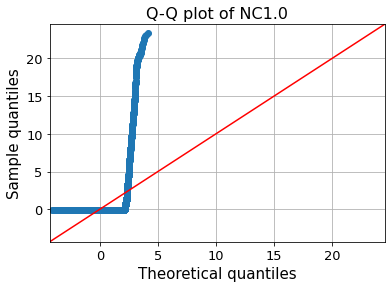

<Figure size 576x360 with 0 Axes>

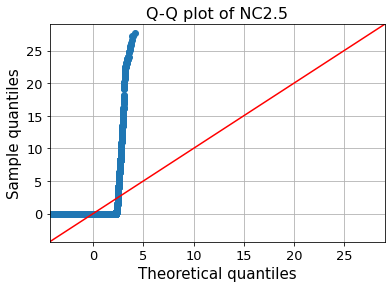

In [664]:
#checking the distribution of independent variables
from statsmodels.graphics.gofplots import qqplot
data_norm=data[[ 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]',
       'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5']]
for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()


D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel

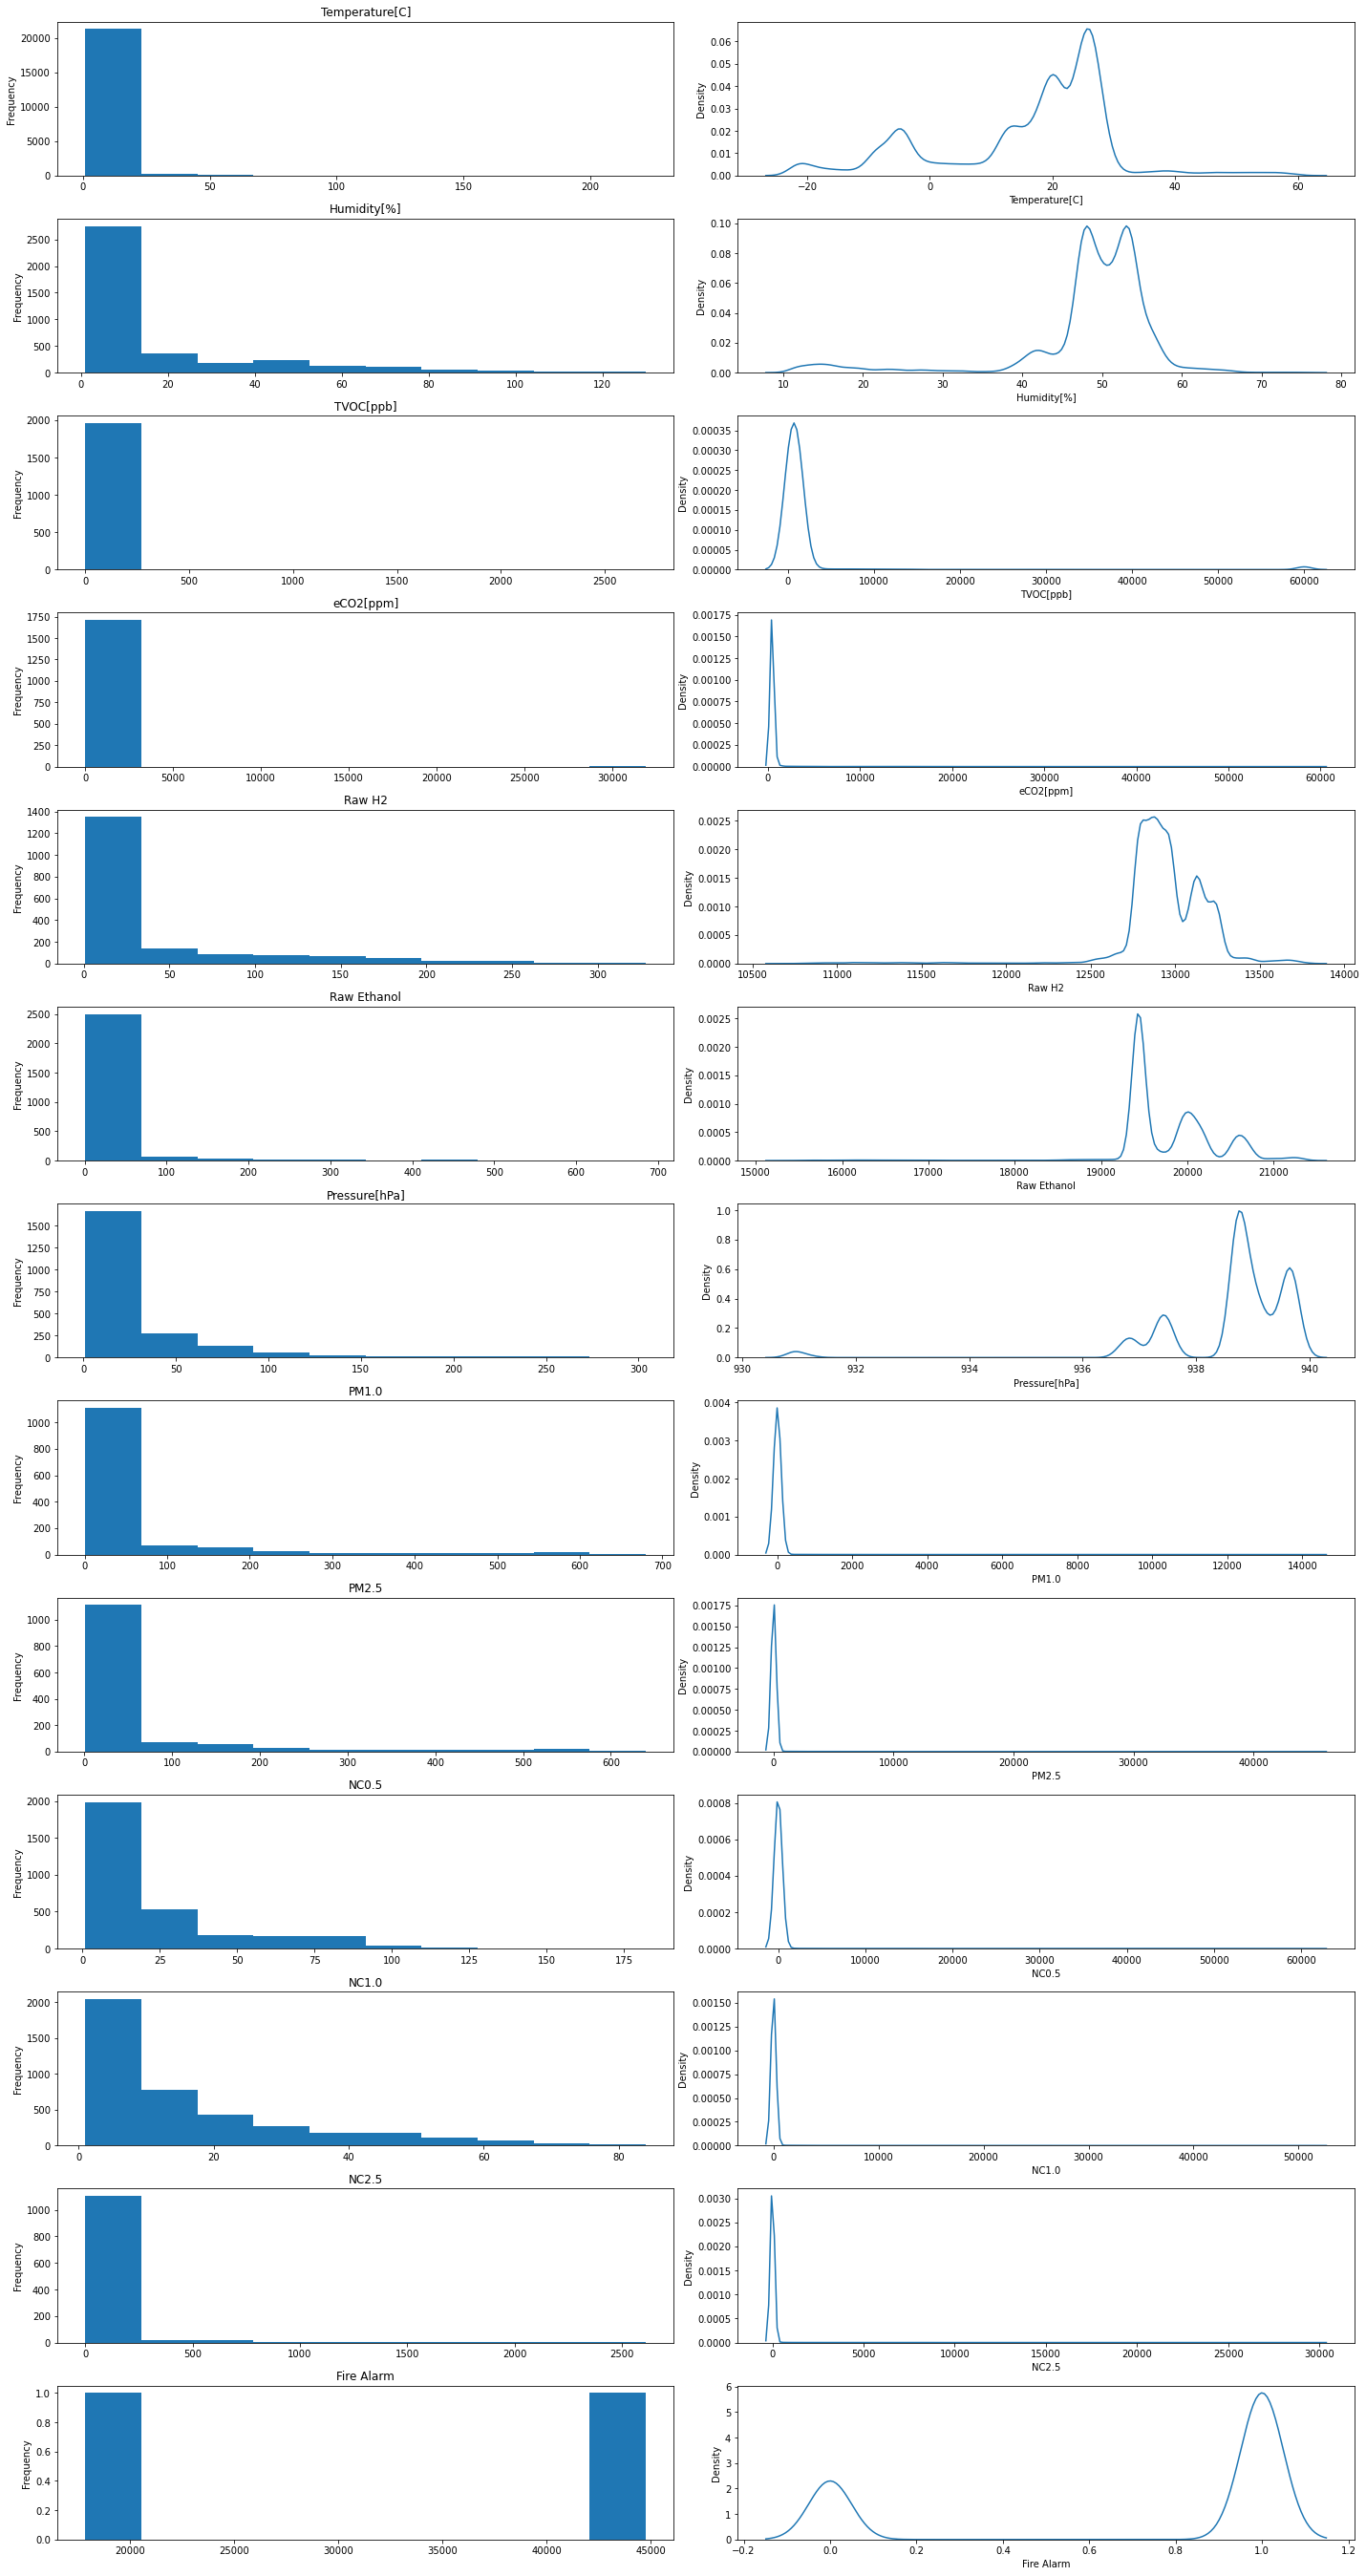

In [90]:
# Plotting Distribution and Histogram side by side
j =1
fig = plt.figure(figsize = (20,40))
for i in data.columns: 
    plt.subplot(14,2,j)
    data[i].value_counts().plot(kind ='hist')
    j=j+1
    plt.title(i)
    plt.subplot(14,2,j)
    sns.distplot(data[i],hist = False)
    j = j+1
    
plt.tight_layout()

From the above histogram and distplots it is evident that most of the fields are skewed. Since the data is skewed that means we have outliers in our dataset. Let's visualize that using Boxplots

<AxesSubplot:>

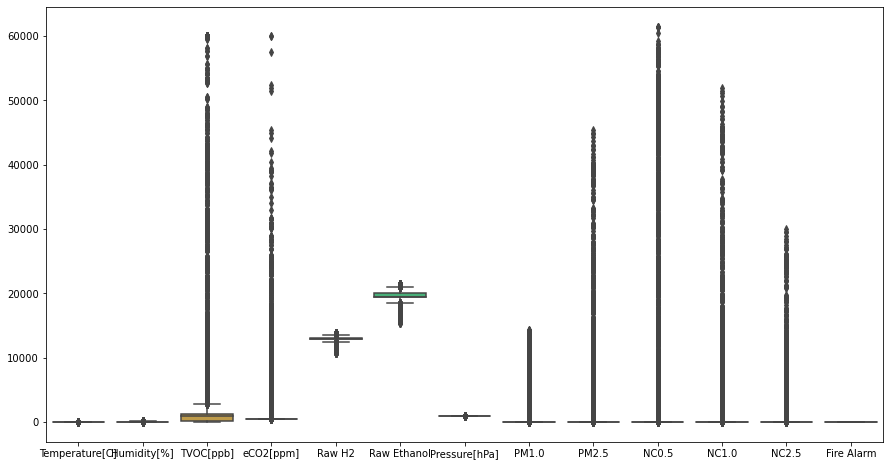

In [168]:
plt.figure(figsize=[15,8])
sns.boxplot(data=data)

### Check the number of outliers

In [638]:
from datasist.structdata import detect_outliers
index = detect_outliers(data,0,['Humidity[%]','TVOC[ppb]','eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5'])
len(index)

17492

### Delete outliers and imputate using median

In [639]:
for col in data[['Humidity[%]','TVOC[ppb]','eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5']]:
    outliers_indices = detect_outliers(data, 0, [col])
    col_median = data[col].median()
    data[col].iloc[outliers_indices] = col_median

C:\Users\85251\AppData\Local\Temp\ipykernel_13880\1147913430.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col].iloc[outliers_indices] = col_median


### Check the boxlpot after processing (no outliers anymore)

<AxesSubplot:>

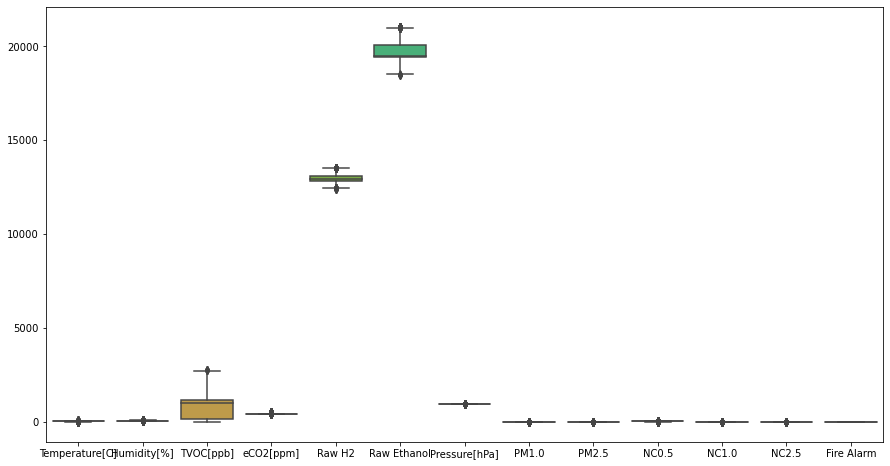

In [640]:
plt.figure(figsize=[15,8])
sns.boxplot(data=data)

### Check the correlation between all features in the data

In [176]:
data.corr()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
Temperature[C],1.000000,-0.127367,0.055106,0.081636,-0.176451,-0.045040,-0.251203,-0.034288,-0.034564,-0.034197,-0.034447,-0.042988,-0.163902
Humidity[%],-0.127367,1.000000,0.119093,-0.157296,0.176345,-0.321438,0.313801,-0.207245,-0.210099,-0.205423,-0.209972,-0.153760,0.378919
TVOC[ppb],0.055106,0.119093,1.000000,0.161169,-0.323739,-0.782919,-0.025562,0.314908,0.317943,0.309934,0.317114,0.246119,0.508282
eCO2[ppm],0.081636,-0.157296,0.161169,1.000000,-0.267065,-0.038702,-0.064398,0.144845,0.146189,0.146550,0.146197,0.123596,0.004110
Raw H2,-0.176451,0.176345,-0.323739,-0.267065,1.000000,0.206188,0.242804,-0.270864,-0.264212,-0.284942,-0.266171,-0.309661,0.070035
Raw Ethanol,-0.045040,-0.321438,-0.782919,-0.038702,0.206188,1.000000,-0.175821,-0.158380,-0.158073,-0.161312,-0.158376,-0.154069,-0.537349
Pressure[hPa],-0.251203,0.313801,-0.025562,-0.064398,0.242804,-0.175821,1.000000,-0.072468,-0.075844,-0.068134,-0.075365,-0.011042,0.249797
PM1.0,-0.034288,-0.207245,0.314908,0.144845,-0.270864,-0.158380,-0.072468,1.000000,0.989942,0.993355,0.990614,0.884380,0.299612
PM2.5,-0.034564,-0.210099,0.317943,0.146189,-0.264212,-0.158073,-0.075844,0.989942,1.000000,0.986808,0.999043,0.883566,0.303574
NC0.5,-0.034197,-0.205423,0.309934,0.146550,-0.284942,-0.161312,-0.068134,0.993355,0.986808,1.000000,0.987723,0.889133,0.293233


### Create the heat map of the correlation

<AxesSubplot:>

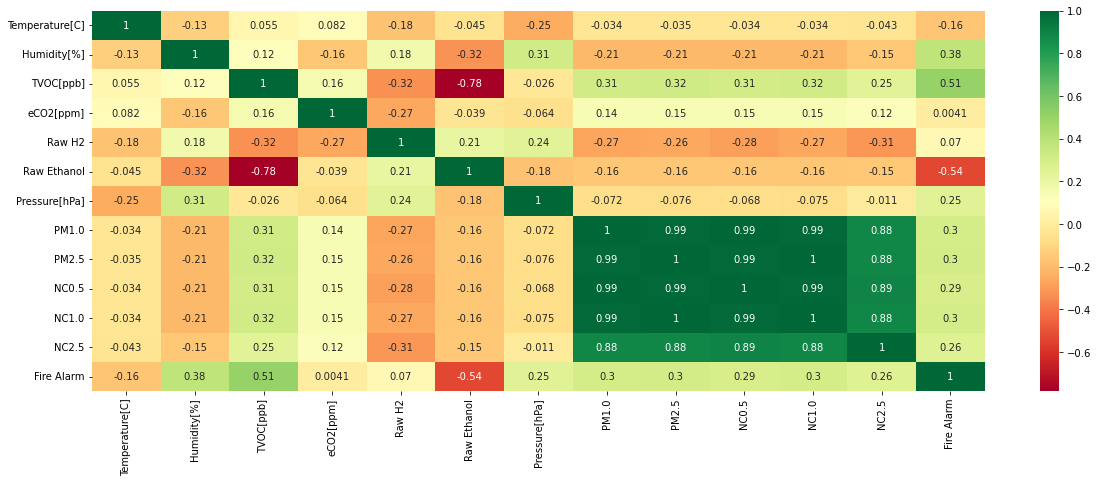

In [236]:
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')

### Identifing predictor significance

In [129]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(data['Fire Alarm'], data[['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]',
       'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             Fire Alarm   R-squared (uncentered):                   0.865
Model:                            OLS   Adj. R-squared (uncentered):              0.865
Method:                 Least Squares   F-statistic:                          3.345e+04
Date:                Sun, 02 Oct 2022   Prob (F-statistic):                        0.00
Time:                        15:12:49   Log-Likelihood:                         -15630.
No. Observations:               62630   AIC:                                  3.128e+04
Df Residuals:                   62618   BIC:                                  3.139e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Temperature[C]    -0.0029   9.03e-05    -31.702      0.000      -0.003      -0.003
Humidity[%]        0.0035      0.000     18.180      0.000       0.003       0.004
TVOC[ppb]      -3.543e-05    3.1e-07   -114.193      0.000    -3.6e-05   -3.48e-05
eCO2[ppm]       2.161e-05   1.07e-06     20.153      0.000    1.95e-05    2.37e-05
Raw H2             0.0005   7.45e-06     61.546      0.000       0.000       0.000
Raw Ethanol       -0.0007   3.18e-06   -215.555      0.000      -0.001      -0.001
Pressure[hPa]      0.0088      0.000     77.450      0.000       0.009       0.009
PM1.0              1.5334      0.420      3.655      0.000       0.711       2.356
PM2.5             -0.1874      0.426     -0.440      0.660      -1.022       0.647
NC0.5             -1.0298      0.079    -13.062      0.000      -1.184      -0.875
NC1.0              5.5675      0.727      7.662      0.000       4.143       6.992
NC2.5             -9.3322      0.934     -9.987      0.000     -11.164      -7.501
==============================================================================
Omnibus:                     7691.811   Durbin-Watson:                   0.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14451.922
Skew:                          -0.802   Prob(JB):                         0.00
Kurtosis:                       4.722   Cond. No.                     2.23e+07
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.23e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Considering the significance value of 0.05 because accuracy in predicting the age of the abalone is not that critical

Except **PM2.5** has the p-value 0.646, which is greater and hence it is a non significant feature, all other features are significant.


### Building the Model

In [641]:
# change the name of columns
data['Humidity']=data['Humidity[%]']
data['Temperature']=data['Temperature[C]']
data['TVOC']=data['TVOC[ppb]']
data['ECO2']=data['eCO2[ppm]']
data['Pressure']=data['Pressure[hPa]']

In [642]:
from sklearn.model_selection import  train_test_split

# X = data[ [ 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]',
#        'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5']]

X = data[ [ 'Temperature', 'Humidity', 'TVOC', 'ECO2',
       'Raw H2', 'Raw Ethanol', 'Pressure', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5']]

y = data['Fire Alarm']

#Spliting data into Training 90%, Test set 10%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

### Rank the important features from logistic regeression

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


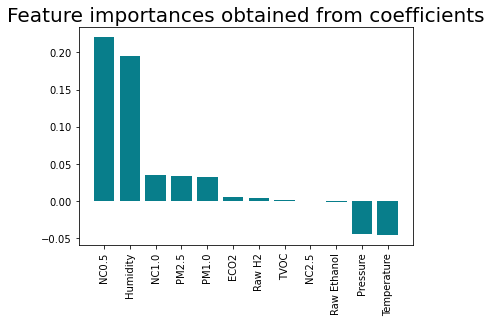

In [647]:
model = LogisticRegression()
model.fit(X_train, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

### Rank the important features from xgboost

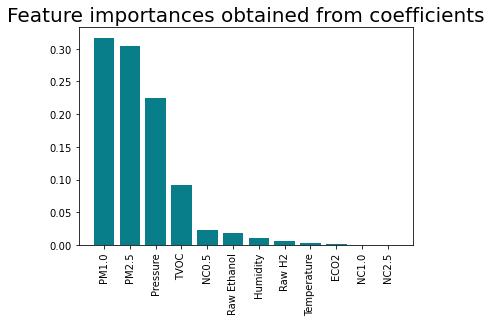

In [646]:
model = XGBClassifier()
model.fit(X_train, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

### Rank the important features from randomforest

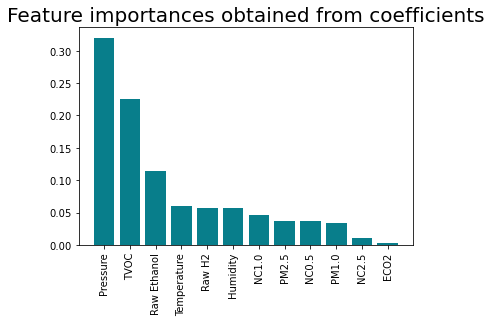

In [657]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

### LogsiticRegression, print the accuracy

In [643]:
model=LogisticRegression()
model.fit(X_train,y_train)
prediction = model.predict(X_test)
accuracyScore = accuracy_score(prediction,y_test)
print(accuracyScore)

0.8893501516844963


D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [182]:
## preprunning
parameter={
    'criterion':['gini','entropy','log_loss'],
    'max_depth':[1,2,3,4,5]
}

cv=GridSearchCV(treemodel,parameter,scoring='accuracy',cv=5)
cv.fit(X_train,y_train)
cv.best_params_
y_predtree=cv.predict(X_test)

dttrain=accuracy_score(y_train, cv.predict(X_train))
dttest=accuracy_score(y_test, cv.predict(X_test))
print(classification_report(y_predtree,y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1780
           1       1.00      1.00      1.00      4483

    accuracy                           1.00      6263
   macro avg       1.00      1.00      1.00      6263
weighted avg       1.00      1.00      1.00      6263



D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "D:\anaconda\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_message, FitFailedWarning)
D:\anaconda\lib\site-packag

### Creating confusion matrix to see the predict situation

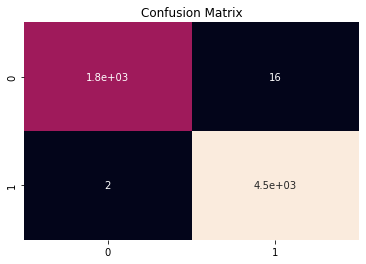

In [183]:
conmat = confusion_matrix(y_test, y_predtree)
sns.heatmap(conmat, annot=True, cbar=False)
plt.title("Confusion Matrix")
plt.show()

### Print Mean Squared Error

In [228]:
# Make predictions using the testing set
y_pred = model.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)


Mean squared error: 0.11
Coefficient of determination: 0.46
R^2 score on test set = 0.45864412665175414


### Delete 1% randomly and fill by mean

In [408]:
#Reading dataset
data = pd.read_csv("C:\\Users\\85251\\Desktop\\6105\\a1\\smoke_detection_iot.csv", index_col=0)
data1 = data[ [ 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]',
       'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5']]
data1

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5
0,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000
1,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000
2,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000
3,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000
4,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
62625,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015
62626,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015
62627,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014
62628,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014


In [409]:
# delete outliers and imputate using median
for col in data1[['Humidity[%]','TVOC[ppb]','eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5']]:
    outliers_indices = detect_outliers(data1, 0, [col])
    col_median = data1[col].median()
    data1[col].iloc[outliers_indices] = col_median

C:\Users\85251\AppData\Local\Temp\ipykernel_13880\3701893543.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[col].iloc[outliers_indices] = col_median


In [411]:
# delete 1%
import random, math

rand = random.sample(range(0, 62629), 626)
for j in rand:
    for i in range(12):
        data1.iloc[rand, i] = None
    print(j)



C:\Users\85251\AppData\Local\Temp\ipykernel_13880\1323190980.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.iloc[rand, i] = None


37270
15032
46446
12256
18321
11578
20915
43554
7132
57180
19947
57950
38735
30624
35311
53566
7185
21136
24166
28169
23310
16235
43034
62249
40311
57864
5135
22668
52642
1973
41541
16281
17490
17049
37313
61365
11165
4425
26000
41252
9257
8456
48081
54073
57483
54676
25651
52632
10137
21193
19421
44305
46076
46437
44705
11721
42286
41034
25793
62339
5196
22336
34481
46243
58880
43553
3103
2841
27473
14043
18096
62347
32924
43607
14555
50941
20023
21811
9760
60031
21583
5411
14669
35881
31873
57430
412
20011
19814
39084
28534
54876
34255
30535
45108
54402
27433
11366
43127
54798
31740
15562
48757
56315
35662
14812
34760
20251
52663
8156
43831
29114
39502
38928
14419
57685
55446
56551
37146
39250
627
1600
5114
26870
18848
2435
31932
10065
53585
36841
52125
60669
33236
31188
23657
56858
2615
29179
1864
6501
61667
44171
28767
60807
46213
9477
54828
48584
51290
50627
20222
1268
36801
27414
26675
27534
18475
25714
60020
10743
39898
41419
2949
31234
39537
7607
50133
54480
25462
46708
60856
2

In [412]:
data1.isnull().sum()

Temperature[C]    626
Humidity[%]       626
TVOC[ppb]         626
eCO2[ppm]         626
Raw H2            626
Raw Ethanol       626
Pressure[hPa]     626
PM1.0             626
PM2.5             626
NC0.5             626
NC1.0             626
NC2.5             626
dtype: int64

In [413]:
# imputate by mean
data1 = data1.fillna(data.mean())

In [414]:
data1.isnull().sum()

Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
dtype: int64

In [415]:
from sklearn.model_selection import  train_test_split

X = data1[ [ 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]',
       'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5']]

y = data['Fire Alarm']

#Spliting data into Training 90%, Test set 10%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [416]:
# print accuracy
model=LogisticRegression()
model.fit(X_train,y_train)
prediction = model.predict(X_test)
accuracyScore = accuracy_score(prediction,y_test)
print(accuracyScore)

0.8746607057320773


D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [417]:
# Make predictions using the testing set
y_pred = model.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)


Mean squared error: 0.13
Coefficient of determination: 0.39
R^2 score on test set = 0.3867758144612222


### Delete 5% randomly and fill by mean

In [418]:
#Reading dataset
data = pd.read_csv("C:\\Users\\85251\\Desktop\\6105\\a1\\smoke_detection_iot.csv", index_col=0)
data2 = data[ [ 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]',
       'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5']]
data2

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5
0,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000
1,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000
2,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000
3,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000
4,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
62625,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015
62626,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015
62627,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014
62628,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014


In [419]:
# delete outliers and imputate using median
for col in data2[['Humidity[%]','TVOC[ppb]','eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5']]:
    outliers_indices = detect_outliers(data2, 0, [col])
    col_median = data2[col].median()
    data2[col].iloc[outliers_indices] = col_median

C:\Users\85251\AppData\Local\Temp\ipykernel_13880\2746632424.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2[col].iloc[outliers_indices] = col_median


In [420]:
# 5%
import random, math

rand = random.sample(range(0, 62629), 626 * 5)
for j in rand:
    for i in range(12):
        data2.iloc[rand, i] = None
    print(j)


C:\Users\85251\AppData\Local\Temp\ipykernel_13880\1610266117.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.iloc[rand, i] = None


7472
30244
55393
26766
21999
12869
4950
45580
32313
14252
55312
56660
27079
13682
17321
7362
61406
10151
7492
54195
522
10574
2722
38296
58945
12975
14422
41159
58449
45727
42655
29258
32250
720
44109
42451
51229
27184
45584
20691
57182
60821
52516
34197
19011
12384
8173
41860
27720
10345
9738
2421
34620
12988
2840
38309
18250
4962
7113
47063
45555
48658
52996
694
22277
4170
49274
42798
36201
40685
8511
51539
10509
20749
47463
47502
55975
40258
19142
40664
21261
32210
33378
11215
7342
55526
59108
1962
21615
47482
14881
10364
12381
13467
8384
14382
7502
11125
17505
54924
4520
40246
18126
45931
12905
27369
30929
10266
50514
16052
35756
19445
21025
31236
22262
2468
7474
54673
61138
17728
15186
1934
50585
34523
34024
2546
41483
28089
55601
6023
10669
62447
16575
25066
2033
29646
31580
27683
36279
6303
30689
16940
22279
33464
23848
61989
24264
4697
17311
19173
32833
18559
26683
52000
16236
48515
16667
22477
10950
37968
60952
11655
49613
13820
33407
28658
47547
50354
42054
40195
38582
34364


44733
51487
21873
35241
7976
45593
113
60843
14266
6652
58575
31998
56177
28611
14951
9863
3692
58664
29824
46155
29298
29622
38113
6015
11194
22452
2853
35115
60804
6572
13720
54538
50113
31335
8958
24310
10546
40050
32288
1068
48265
27855
505
8044
60191
51223
9815
24688
27897
57753
14345
58690
12148
37543
56937
36737
43009
36566
32950
41780
16443
50764
17854
42131
10465
55593
47194
4441
25733
10840
46442
22716
33751
5552
16558
10917
36446
39349
53983
59501
7399
21942
58243
33897
41398
15122
19294
29969
47831
60756
53123
9501
20190
27657
33815
26479
2167
50055
18125
33066
24373
3344
41366
49684
55801
58965
61800
13369
45460
7328
11928
13549
15586
17817
30726
62344
1613
13768
18750
5409
47080
28539
52591
33879
31537
25896
28857
18973
39258
54093
23391
48128
27544
34265
31336
29973
53051
32962
18639
61340
62493
56652
21524
38531
41623
34168
6589
13532
15579
31506
52225
51364
36285
40294
29691
9500
44341
17337
14315
54882
54519
35932
30049
37878
1993
40535
41319
9311
45558
30837
3673
361

2396
31058
40938
2657
32353
23085
50839
9840
41847
36588
8950
57676
49869
26697
28860
7489
3351
7852
48300
2502
17874
34409
58380
41608
28890
22511
59131
44347
53885
48572
295
30338
9358
55989
47022
34158
47135
22227
1275
26243
59882
14823
20831
13438
56019
62092
41584
13959
34811
2879
57173
27355
52883
60056
31029
6723
16603
13527
26436
44581
8225
59170
34430
70
22932
14011
53656
30536
19789
60975
14739
44219
2878
17263
37029
49006
40020
38658
551
14703
16373
38054
41714
16141
36784
2272
57340
19253
44250
19360
21527
51080
13370
30364
59120
19827
40224
15791
32864
62559
13284
37789
47913
30085
31589
17530
46417
54636
47395
42175
22891
28606
21830
50589
34129
12764
55453
16619
30465
16858
2718
7200
41989
15875
40969
31732
59631
35288
52477
38488
47213
992
47570
36289
33544
18181
58472
20230
47582
38698
61047
15291
25917
42634
40353
50301
29651
40537
17597
34998
23966
24376
48905
26554
9684
1742
46391
25739
17077
35099
16043
54437
41571
36308
36198
10001
12271
39615
21950
5498
14427
575

In [421]:
data2.isnull().sum()

Temperature[C]    3130
Humidity[%]       3130
TVOC[ppb]         3130
eCO2[ppm]         3130
Raw H2            3130
Raw Ethanol       3130
Pressure[hPa]     3130
PM1.0             3130
PM2.5             3130
NC0.5             3130
NC1.0             3130
NC2.5             3130
dtype: int64

In [422]:
data2 = data2.fillna(data.mean())

In [423]:
data2.isnull().sum()

Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
dtype: int64

In [424]:
from sklearn.model_selection import  train_test_split

X = data2[ [ 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]',
       'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5']]

y = data['Fire Alarm']

#Spliting data into Training 90%, Test set 10%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [425]:
model=LogisticRegression()
model.fit(X_train,y_train)
prediction = model.predict(X_test)
accuracyScore = accuracy_score(prediction,y_test)
print(accuracyScore)

0.8623662781414657


D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [426]:
# Make predictions using the testing set
y_pred = model.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)


Mean squared error: 0.14
Coefficient of determination: 0.33
R^2 score on test set = 0.32662516186697277


### Delete 10% randomly and fill by mean

In [427]:
#Reading dataset
data = pd.read_csv("C:\\Users\\85251\\Desktop\\6105\\a1\\smoke_detection_iot.csv", index_col=0)
data3 = data[ [ 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]',
       'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5']]
data3

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5
0,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000
1,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000
2,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000
3,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000
4,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
62625,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015
62626,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015
62627,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014
62628,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014


In [428]:
# delete outliers and imputate using median
for col in data3[['Humidity[%]','TVOC[ppb]','eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5']]:
    outliers_indices = detect_outliers(data3, 0, [col])
    col_median = data3[col].median()
    data3[col].iloc[outliers_indices] = col_median

C:\Users\85251\AppData\Local\Temp\ipykernel_13880\1629182319.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3[col].iloc[outliers_indices] = col_median


In [429]:
# 10%
import random, math

rand = random.sample(range(0, 62629), 626 * 10)
for j in rand:
    for i in range(12):
        data3.iloc[rand, i] = None
    print(j)


C:\Users\85251\AppData\Local\Temp\ipykernel_13880\3344998365.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3.iloc[rand, i] = None


18887
14645
31124
30190
45500
45106
19234
26022
47277
8564
53385
24331
24967
16750
31599
7924
18273
49162
56657
60226
43321
24381
47775
41690
44522
25085
2099
57591
58163
27764
18517
5645
53920
30278
6274
50519
2692
49128
53875
21175
46116
33207
33421
44042
33944
60587
46991
61334
50853
16505
39004
62036
22328
29653
28307
23353
30329
50344
14807
44954
8459
8243
19861
16899
40381
61433
46730
46007
8162
14505
31879
10991
51728
23083
6154
39628
47075
8114
9316
20338
26706
1581
28042
16328
57732
3318
9626
50005
40492
42839
10792
18456
8044
43199
16898
60346
9794
43869
22578
55452
17569
30951
13055
52282
54803
30482
3502
2091
1306
5774
58799
58391
45222
45272
41480
10523
57756
23544
41770
61585
41776
57397
3500
35567
45770
22558
12342
44410
13747
19546
9210
7840
34448
38348
31099
17948
29523
33357
4811
13184
61670
38600
17956
13617
43024
29323
18007
7797
6782
27327
13550
55367
44950
39444
25075
32380
4722
10921
31971
57436
8999
62533
11471
8018
15871
17217
24783
43842
5416
26484
21170
4170


7173
26602
49269
46272
30016
42217
58091
52870
34331
58611
24921
62205
17269
29402
11649
20233
14405
47642
38824
20726
48130
34027
56943
2976
33581
21320
40054
38764
2270
3511
11674
5948
14128
46567
6162
17096
6561
43809
6738
22916
25188
18455
9151
14237
50271
32284
3971
26760
28880
46943
22290
60554
31938
46753
25167
49403
33536
25031
61957
10736
27646
54026
35048
56311
6340
33158
54982
62023
29681
40180
467
9759
49232
939
6526
54068
21104
46685
23197
49921
41634
990
25760
36076
61686
60545
6463
52785
21053
21047
44481
25749
20200
1301
56772
48759
47596
25600
62610
56345
25527
12771
50479
7813
47887
46359
25978
10467
45180
24779
60248
35652
17112
11319
42342
50892
9599
20471
37342
25416
61564
29181
59630
33804
47147
5243
24445
55489
55544
49722
1530
45371
14182
43110
23753
11188
9757
863
19270
33931
57729
17756
24187
2968
28676
60527
31111
37225
61394
1174
39013
17528
33404
50099
18753
39454
55071
11260
8618
44999
38592
48641
28095
61149
36134
21706
25952
2743
20162
35773
24935
6929
1

20637
4807
59769
23449
51233
12020
52694
46789
62583
25140
2417
661
45515
42927
47815
48384
42845
17121
10791
53474
6157
14599
40178
56395
54021
6506
10205
23173
56911
35964
52496
52029
42345
8558
46483
16610
5716
46924
4260
8531
19081
12373
48419
57844
35090
30427
33499
11684
25622
1643
40592
29834
21410
48462
26460
53986
7174
49671
18861
21689
14018
17309
55339
36117
53262
14997
12785
54420
45619
9739
23727
10559
50079
54252
41275
38703
18926
10575
26247
14725
52772
2507
37915
36484
42405
23827
1671
12733
19846
12315
19817
31501
19906
13125
54148
19670
470
40991
55193
48265
29256
51738
26203
7050
22634
41130
7679
47557
51607
7980
10246
36173
35465
37575
31307
58431
5705
30099
12421
11353
9668
33246
46721
33414
49010
4470
41438
55552
34194
44537
27741
48717
39782
1738
11894
53963
35177
42807
5508
31331
49291
25592
56684
38390
59256
24201
46423
18553
31140
61939
38636
39487
39090
13946
61268
35124
37498
60447
60702
13589
27347
6244
51882
44392
51271
39313
13993
58693
48528
57245
3006
5

28131
41794
7221
38064
18283
36894
46402
61215
47165
37818
57493
12567
26534
33431
53559
55247
53778
44079
40440
62537
49105
53916
12280
44854
30212
55732
33311
14247
61399
45124
26424
28851
48098
12202
7895
39729
18786
1920
21305
2315
61595
31139
38555
1416
25944
4832
23816
11614
59869
18785
52314
37195
3982
25037
5478
3453
6365
26472
55050
24519
47194
51821
53997
9238
50902
5887
55830
53946
26684
32555
35417
28310
6844
190
57096
47846
27004
52411
749
30695
42188
24782
16842
60245
9578
55317
36848
26944
51845
11682
8193
9633
9996
61275
9488
37058
61559
8015
13601
50105
16894
50245
9301
40828
54820
11370
9213
12176
35310
18696
27487
57368
55964
37945
33338
61578
29442
59265
464
25161
31087
34480
8228
55319
48365
27802
39771
6438
24646
6327
57829
33081
10651
48416
37908
14445
2097
8754
13468
45245
59291
50977
14450
38742
20643
32346
3020
27494
10093
14379
49049
16242
50868
13963
16419
22350
20883
52000
41561
50354
28251
30081
53961
9384
28460
43153
31311
13294
13281
10234
48476
59631
31

32706
29897
29723
61258
31832
42436
20339
35216
44786
227
918
27123
47422
33040
30423
36141
6075
62392
13870
24988
33862
542
9150
43308
31612
53069
33995
53094
47900
20975
12725
1439
846
50472
60348
51719
45446
30717
46523
44705
45315
62451
53960
50118
39604
38430
29638
39633
35236
58045
52023
19853
32961
43395
20141
37033
33214
46178
4212
44605
37564
9535
58290
53043
2756
3758
2687
37757
33034
10359
44858
41396
59270
21076
865
31367
868
3366
11866
47560
53307
7362
11628
9020
25767
2523
18398
58418
36203
16680
10802
19591
31069
22063
30118
68
48059
59523
48626
34305
30103
3150
50538
650
38722
34836
1723
60561
48329
32575
8430
18667
32168
61839
13511
15424
7658
585
31790
44628
37746
43288
8787
14303
46337
29814
7171
14384
13901
45973
53232
28027
56542
10620
42173
22548
24063
349
3924
52037
44752
31253
39291
44650
4904
33500
16759
28985
40410
2279
32311
52351
27763
58335
48184
52890
5930
54094
6936
40776
60474
10106
7681
659
22837
47275
21364
45900
51770
57032
23655
40853
37357
51029
365

In [430]:
data3.isnull().sum()

Temperature[C]    6260
Humidity[%]       6260
TVOC[ppb]         6260
eCO2[ppm]         6260
Raw H2            6260
Raw Ethanol       6260
Pressure[hPa]     6260
PM1.0             6260
PM2.5             6260
NC0.5             6260
NC1.0             6260
NC2.5             6260
dtype: int64

In [431]:
data3 = data3.fillna(data.mean())

In [432]:
data3.isnull().sum()

Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
dtype: int64

In [433]:
from sklearn.model_selection import  train_test_split

X = data3[ [ 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]',
       'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5']]

y = data['Fire Alarm']

#Spliting data into Training 90%, Test set 10%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [434]:
model=LogisticRegression()
model.fit(X_train,y_train)
prediction = model.predict(X_test)
accuracyScore = accuracy_score(prediction,y_test)
print(accuracyScore)

0.8427271275746447


D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [435]:
# Make predictions using the testing set
y_pred = model.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)


Mean squared error: 0.16
Coefficient of determination: 0.23
R^2 score on test set = 0.23054035317745725


### Delete1% and drop columns

In [502]:
#Reading dataset
data = pd.read_csv("C:\\Users\\85251\\Desktop\\6105\\a1\\smoke_detection_iot.csv", index_col=0)
data1 = data[ [ 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]',
       'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5', 'Fire Alarm']]
data1

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0
1,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,0
2,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,0
3,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,0
4,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,0
62626,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,0
62627,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,0
62628,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,0


In [503]:
# delete outliers and imputate using median
for col in data1[['Humidity[%]','TVOC[ppb]','eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5']]:
    outliers_indices = detect_outliers(data1, 0, [col])
    col_median = data1[col].median()
    data1[col].iloc[outliers_indices] = col_median

C:\Users\85251\AppData\Local\Temp\ipykernel_13880\3701893543.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[col].iloc[outliers_indices] = col_median


In [504]:
# delete 1%
import random, math

rand = random.sample(range(0, 62629), 626)
for j in rand:
    for i in range(12):
        data1.iloc[rand, i] = None
    print(j)



C:\Users\85251\AppData\Local\Temp\ipykernel_13880\1323190980.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.iloc[rand, i] = None


21701
33107
10468
47991
23997
43299
18408
10764
23843
13596
31140
33664
57030
16502
5867
53772
54376
59542
4103
13703
34617
59033
51899
61211
57428
46127
28001
50978
54762
45567
39414
42774
31552
23910
14321
9357
40576
49429
3926
3155
52313
35860
24403
18242
5608
24272
8280
60487
60605
6068
52930
1326
30654
5644
34419
25596
8639
20295
50632
47806
12674
46561
5620
51873
4015
16686
18047
23751
41634
44739
20394
52965
35941
17671
34391
58229
28732
22330
36799
22031
51335
46854
11194
41867
45494
52199
3755
41240
22229
41586
32865
34197
24514
55789
1862
14672
24187
57223
7630
62046
49876
26314
27297
53184
23038
42676
14021
59289
1545
12303
56881
23319
50275
47901
27063
20468
38844
46270
23848
41778
62192
3260
42517
30191
60761
7241
20100
55644
36312
3893
58297
9552
45442
9315
32856
41663
41756
15290
11341
9477
59988
55427
43741
25503
1500
23979
16766
16724
25409
52373
1015
15564
33754
24365
32238
35524
45066
46861
59664
9597
33959
49068
43010
48187
38536
5931
40597
6491
49071
2275
13232
479

In [505]:
data1.isnull().sum()

Temperature[C]    626
Humidity[%]       626
TVOC[ppb]         626
eCO2[ppm]         626
Raw H2            626
Raw Ethanol       626
Pressure[hPa]     626
PM1.0             626
PM2.5             626
NC0.5             626
NC1.0             626
NC2.5             626
Fire Alarm          0
dtype: int64

In [506]:
# imputate by mean
data1 = data1.dropna()

In [507]:
data1.isnull().sum()

Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
Fire Alarm        0
dtype: int64

In [508]:
data.describe()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,6.263000e+04,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,1.654792e+09,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,1.100025e+05,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.654743e+09,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,1.654762e+09,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,1.654778e+09,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


In [509]:
from sklearn.model_selection import  train_test_split

X = data1[ [ 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]',
       'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5']]

y = data1['Fire Alarm']

#Spliting data into Training 90%, Test set 10%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [510]:
# print accuracy
model=LogisticRegression()
model.fit(X_train,y_train)
prediction = model.predict(X_test)
accuracyScore = accuracy_score(prediction,y_test)
print(accuracyScore)

0.8734075149169489


D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [511]:
# Make predictions using the testing set
y_pred = model.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)


Mean squared error: 0.13
Coefficient of determination: 0.38
R^2 score on test set = 0.37571242207603006


### Delete 5% and drop columns

In [512]:
#Reading dataset
data = pd.read_csv("C:\\Users\\85251\\Desktop\\6105\\a1\\smoke_detection_iot.csv", index_col=0)
data2 = data[ [ 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]',
       'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5', 'Fire Alarm']]
data2

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0
1,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,0
2,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,0
3,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,0
4,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,0
62626,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,0
62627,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,0
62628,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,0


In [513]:
# delete outliers and imputate using median
for col in data2[['Humidity[%]','TVOC[ppb]','eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5']]:
    outliers_indices = detect_outliers(data2, 0, [col])
    col_median = data2[col].median()
    data2[col].iloc[outliers_indices] = col_median

C:\Users\85251\AppData\Local\Temp\ipykernel_13880\2746632424.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2[col].iloc[outliers_indices] = col_median


In [514]:
# delete 1%
import random, math

rand = random.sample(range(0, 62629), 626 * 5)
for j in rand:
    for i in range(12):
        data2.iloc[rand, i] = None
    print(j)



C:\Users\85251\AppData\Local\Temp\ipykernel_13880\3806502820.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.iloc[rand, i] = None


14195
7597
58007
52675
14961
6164
42425
42982
15696
54681
45697
61387
3671
2344
25725
57802
34469
25261
22686
59544
48772
44059
9448
38902
18872
15497
24044
13023
22257
44561
51311
36713
29037
51871
54703
24936
31224
12339
48995
10613
3333
21222
56577
40780
28021
40580
17220
29704
53048
26117
33964
30592
13141
32098
42696
1468
56245
14456
36406
52681
6854
24784
14858
42616
32195
59859
19857
46844
23888
31336
35769
49223
49775
51597
36725
46490
48341
8573
58981
55994
41818
10706
19817
22768
59165
29281
15690
30403
3291
15543
28136
18833
6876
40060
28976
36791
54593
47397
47322
58446
49507
20273
48176
46144
16387
31695
34675
4245
4434
26126
34362
29867
52770
54837
20758
17008
56812
10699
11190
24583
14768
3150
164
51073
43420
76
44503
40677
47359
17384
20513
50784
6564
46111
17498
56887
13667
15365
61624
3471
46089
18972
16601
57091
27064
8560
45183
28503
11682
14760
37553
59432
23503
43994
19180
8695
55278
56300
33944
2424
20779
1212
4909
55608
23811
26971
39655
4722
529
34160
32110
933

35063
20572
44473
12019
27344
34673
54949
39199
27943
58399
50473
1614
17925
10125
4960
7198
41295
7291
45968
18191
17844
25204
12264
43541
5182
59514
9639
13246
9573
9389
31199
55830
38272
4529
17789
37677
42456
437
15751
11919
38548
7841
27595
60032
45274
23019
22688
38599
58505
49482
59284
59667
3558
8475
8480
18764
28741
26784
22760
30492
24864
61881
30273
29480
26106
48255
31288
61879
61451
58451
56929
34202
32218
61718
51110
5433
34061
27842
32962
25920
26200
58170
41478
25999
6799
18059
46914
13924
36156
22443
54114
49573
41701
18001
50346
17283
24100
50065
56241
9953
31778
15043
52108
27406
50029
46840
25728
19931
23744
60309
39715
43081
45497
58316
22393
49045
38846
26167
55270
51635
52552
52565
30585
237
23780
42230
42177
45014
45218
41879
15101
9514
1801
14355
636
44920
6655
26256
21938
40139
53387
6787
51972
23610
60358
27891
61548
29557
9503
7828
53081
49225
34950
42022
62020
44593
56549
50949
31770
30904
37584
33707
26458
59181
28902
23007
61602
41492
29193
54601
53718
23

18752
22883
34822
4074
27747
48977
19751
50041
48713
52621
22849
8608
57467
57590
45489
17917
26664
38478
1180
32139
19364
13610
2705
15359
12486
21340
20887
11201
8879
33748
21777
9090
4737
15403
1306
34139
6336
55844
28456
33431
16137
14592
22274
23513
7788
43405
8552
48317
45782
55654
49930
8553
21227
55679
21379
34238
44858
43362
18468
2755
20640
13972
25879
4587
11369
18572
21316
17364
25456
8549
2660
59664
15171
5982
47445
32314
38823
41995
50505
5196
6976
11490
51145
3706
11068
47627
49732
4221
15523
27546
21179
49381
2289
51154
38611
46496
20672
36287
7606
18749
39117
21680
48440
38781
35284
50523
30627
19492
2521
52610
3661
59751
42527
46667
23374
11613
34480
40116
25810
44133
52435
22203
23437
33679
40658
49267
16037
41220
61530
51703
57860
43383
18837
48010
41000
29959
11971
42473
51659
61467
20831
7768
25176
51926
35670
56144
50876
26590
30453
23156
189
12283
44183
45098
31661
27847
14296
39772
20616
35370
21210
31973
3299
47514
37536
45441
48150
42737
39446
43480
49182
683

In [515]:
data2.isnull().sum()

Temperature[C]    3130
Humidity[%]       3130
TVOC[ppb]         3130
eCO2[ppm]         3130
Raw H2            3130
Raw Ethanol       3130
Pressure[hPa]     3130
PM1.0             3130
PM2.5             3130
NC0.5             3130
NC1.0             3130
NC2.5             3130
Fire Alarm           0
dtype: int64

In [516]:
# imputate by mean
data2 = data2.dropna()

In [517]:
data2.isnull().sum()

Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
Fire Alarm        0
dtype: int64

In [518]:
data2.describe()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
count,59500.000000,59500.000000,59500.000000,59500.000000,59500.000000,59500.000000,59500.000000,59500.000000,59500.000000,59500.000000,59500.000000,59500.000000,59500.000000
mean,15.972175,50.419942,702.416504,406.839798,12959.714588,19770.920370,938.629079,1.623384,1.684601,11.194524,1.740917,0.040667,0.714857
std,14.340982,3.716774,535.705463,15.794107,166.422490,435.996998,1.328869,0.654146,0.681573,4.483401,0.703298,0.014467,0.451486
min,-22.010000,38.980000,0.000000,400.000000,12412.000000,18475.000000,930.852000,0.070000,0.080000,0.430000,0.087000,0.007000,0.000000
25%,11.058500,47.990000,130.000000,400.000000,12837.000000,19438.000000,938.700000,1.340000,1.377500,9.340000,1.425000,0.036000,0.000000
50%,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.817000,1.810000,1.880000,12.450000,1.943000,0.044000,1.000000
75%,25.400000,53.170000,1164.000000,405.000000,13102.000000,20059.000000,939.417000,2.060000,2.140000,14.200000,2.214000,0.050000,1.000000
max,59.930000,61.800000,2773.000000,495.000000,13527.000000,21042.000000,939.861000,3.280000,3.410000,22.560000,3.518000,0.077000,1.000000


In [519]:
from sklearn.model_selection import  train_test_split

X = data2[ [ 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]',
       'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5']]

y = data2['Fire Alarm']

#Spliting data into Training 90%, Test set 10%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [520]:
# print accuracy
model=LogisticRegression()
model.fit(X_train,y_train)
prediction = model.predict(X_test)
accuracyScore = accuracy_score(prediction,y_test)
print(accuracyScore)

0.8926050420168067


D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [521]:
# Make predictions using the testing set
y_pred = model.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)


Mean squared error: 0.11
Coefficient of determination: 0.48
R^2 score on test set = 0.4799224243777207


### Delete 10% and drop columns

In [522]:
#Reading dataset
data = pd.read_csv("C:\\Users\\85251\\Desktop\\6105\\a1\\smoke_detection_iot.csv", index_col=0)
data3 = data[ [ 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]',
       'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5', 'Fire Alarm']]
data3

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0
1,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,0
2,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,0
3,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,0
4,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,0
62626,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,0
62627,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,0
62628,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,0


In [523]:
# delete outliers and imputate using median
for col in data3[['Humidity[%]','TVOC[ppb]','eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5']]:
    outliers_indices = detect_outliers(data3, 0, [col])
    col_median = data3[col].median()
    data3[col].iloc[outliers_indices] = col_median

C:\Users\85251\AppData\Local\Temp\ipykernel_13880\1629182319.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3[col].iloc[outliers_indices] = col_median


In [524]:
# delete 1%
import random, math

rand = random.sample(range(0, 62629), 626 * 10)
for j in rand:
    for i in range(12):
        data3.iloc[rand, i] = None
    print(j)



C:\Users\85251\AppData\Local\Temp\ipykernel_13880\2640274377.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3.iloc[rand, i] = None


31718
47919
43023
5438
47244
41617
5434
18699
54987
2448
58527
28755
3008
60171
27348
6011
44258
53405
29551
48456
8004
57717
38816
34672
3175
15750
38369
9571
56902
21263
45831
59210
43397
5041
26343
14331
56041
33953
32662
19920
46229
7743
4775
19857
22518
50238
11165
39479
39978
13515
60739
60205
15439
42887
16271
45325
28709
30342
13620
103
57728
50052
19289
23376
15503
48744
41266
11450
41349
58421
44307
15145
34023
44936
56798
28260
39813
31349
43409
45317
31561
41524
54021
52430
29433
14181
29059
2273
38836
43802
32083
15125
5968
47258
19750
23174
42578
26598
59827
56258
33418
6732
26996
49875
24281
161
44367
24695
4320
29313
7496
8570
41295
55007
2212
23464
27571
4375
44261
52095
11695
40137
50930
11130
28243
15327
2103
10902
24229
19169
41289
61665
52222
9859
8782
44053
59340
18219
31310
2768
42743
46046
1599
10151
30410
41762
57001
53215
8096
8176
41299
23624
33768
25389
53368
54584
46870
43759
41785
5291
7077
56849
20097
47406
44373
16835
56009
48516
17913
61831
23851
5829
2

15081
24989
53131
35859
45274
58605
60647
41556
8092
6355
16351
16896
28673
17608
40898
30305
31752
58808
24197
60494
20964
35643
36738
38486
14094
61260
56309
12022
31538
55929
48345
12154
36130
25000
21395
58028
7415
48081
26361
11448
42232
54547
12038
20036
44076
61894
17020
7785
27820
62593
6645
58597
52822
49913
5449
1822
43899
1398
8942
27959
42538
9923
18002
34153
33964
53242
7118
1590
43312
30682
19571
46188
45397
45671
15375
6840
40142
52491
4448
28793
6601
28852
57922
23613
38187
45125
2421
41943
11566
58303
23226
13405
50648
49468
53635
2084
61165
30470
31446
43902
39829
57052
62050
16909
32793
39282
30369
56540
38258
29968
12661
4564
36996
29632
16687
10552
46290
23625
49814
29453
57130
13461
37539
34172
49509
34660
11492
60983
23812
35773
26509
1296
36545
6264
12843
42895
49404
48150
45925
37961
60383
15942
2963
21626
39314
37213
41684
28014
27230
5506
60730
30519
27143
20645
25526
49808
10817
30213
49181
34018
22299
28090
50580
15566
29368
54892
1640
47636
56909
54834
620

51621
49936
35199
32797
17061
43920
19736
33240
11808
34505
57557
21832
26164
53633
89
55748
5295
17278
671
23248
21773
15381
22084
55447
205
62008
21772
49321
52242
20548
44817
51566
13439
31638
377
3274
21498
30262
11993
1727
10909
4856
12145
20420
17524
10336
13136
61852
11049
53953
56475
57055
24618
49848
32254
27295
55258
23741
61546
46920
25359
40279
30272
38827
15402
30473
55800
366
36350
13690
49947
36775
34552
12335
45886
32300
25135
5485
47344
29064
17180
961
12791
37410
32871
8472
21524
45129
15330
44622
41614
45896
49195
33339
47693
31353
23164
34730
43697
9121
5814
43748
29166
26961
51041
42708
3278
32264
51498
13409
24176
61899
41695
3443
48517
45823
5950
24050
35027
3199
13814
17239
29591
38293
40367
9521
29270
18700
28973
19704
30875
1941
4387
41157
58601
42602
30524
6422
51883
12160
17109
36341
52781
15972
30323
60343
52718
59958
16467
56061
8311
58657
8262
53200
27665
7794
2743
4093
61247
7097
7960
50021
58063
46622
6157
62277
3875
40441
35979
15321
33141
11453
45776


60929
53883
2210
60478
21386
51769
58165
61201
44916
51992
43087
29956
52258
58719
10150
20225
26500
51095
59665
16668
39253
48056
20615
20206
17195
2265
41239
45088
56373
45839
40875
14923
30933
8033
62147
59683
38111
47654
23954
31420
59848
48676
26747
36654
8488
43817
6042
51177
15929
396
22408
34189
31577
25222
19161
29267
56614
41373
16652
58729
30104
54237
37181
9512
40942
53397
41691
39919
61739
48099
9433
54980
55672
6387
10048
32317
36584
26157
3576
28690
38413
16942
10509
3332
42989
32900
40471
22352
45336
59542
41917
2385
506
31730
17688
34703
25885
25622
604
34747
12508
39468
46067
30337
62591
33549
17059
34289
36561
44541
61269
12876
21243
19299
54428
14513
21008
59044
45145
51442
10108
52931
28130
55559
2711
58954
49496
30815
25267
59459
23118
47085
26364
26415
25455
4126
48145
19869
50163
35512
27535
23978
56693
16582
22157
7806
3597
5256
13421
49953
35047
10777
58964
47007
42647
5324
52214
2150
56057
6071
33090
22097
3259
55856
19360
60794
44488
52735
17380
53897
6056
1

26189
26244
12719
34804
60203
51294
6286
25708
36532
3210
48700
18757
41246
61600
57277
59421
41002
11913
39853
22748
6752
50862
9041
27857
15835
54589
6462
273
60710
25353
57438
39743
39134
46376
34983
43968
12105
52467
31798
50353
40158
22416
30963
6658
29016
19390
52821
52827
11743
33398
12493
31518
26822
44696
6089
16057
15367
23720
27515
38233
881
12082
1542
24004
41824
52915
1068
26664
53494
30671
9396
12450
24195
48626
58301
39499
2996
60448
44763
10324
38477
62427
37587
10872
3957
38872
53603
34154
7967
49206
10526
29405
38082
18592
7365
32312
38099
32640
50885
5742
21874
35564
13667
55177
40423
6095
27404
26394
21099
23618
50632
55219
50372
23923
31777
28459
17517
2407
39951
13769
7331
14535
46451
12355
49193
59352
48084
15270
6024
31751
24944
22600
54693
18608
47739
58410
17646
28539
45507
14316
58291
56182
26159
4168
31426
31734
15414
56746
38556
58401
4593
13544
8925
937
45862
62604
18475
62495
50361
27308
8690
16615
21579
8164
42549
38842
14140
8563
17640
55224
23065
33071

In [525]:
data3.isnull().sum()

Temperature[C]    6260
Humidity[%]       6260
TVOC[ppb]         6260
eCO2[ppm]         6260
Raw H2            6260
Raw Ethanol       6260
Pressure[hPa]     6260
PM1.0             6260
PM2.5             6260
NC0.5             6260
NC1.0             6260
NC2.5             6260
Fire Alarm           0
dtype: int64

In [526]:
# imputate by mean
data3 = data3.dropna()

In [527]:
data3.isnull().sum()

Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
Fire Alarm        0
dtype: int64

In [528]:
data3.describe()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
count,56370.000000,56370.000000,56370.000000,56370.000000,56370.000000,56370.000000,56370.000000,56370.000000,56370.000000,56370.000000,56370.000000,56370.000000,56370.000000
mean,15.969486,50.409499,702.417013,406.879954,12959.309189,19770.807610,938.628009,1.623508,1.684647,11.196859,1.740925,0.040671,0.714937
std,14.345957,3.721079,535.312386,15.849640,166.328333,436.625875,1.330496,0.652812,0.680183,4.472600,0.701886,0.014433,0.451448
min,-22.010000,38.980000,0.000000,400.000000,12412.000000,18475.000000,930.852000,0.070000,0.080000,0.430000,0.087000,0.007000,0.000000
25%,10.986250,47.990000,130.000000,400.000000,12837.000000,19438.000000,938.700000,1.340000,1.380000,9.370000,1.427000,0.036000,0.000000
50%,20.126500,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.817000,1.810000,1.880000,12.450000,1.943000,0.044000,1.000000
75%,25.410000,53.160000,1164.000000,405.000000,13102.000000,20059.000000,939.417000,2.060000,2.140000,14.190000,2.214000,0.050000,1.000000
max,59.930000,61.800000,2768.000000,495.000000,13527.000000,21042.000000,939.861000,3.280000,3.410000,22.560000,3.518000,0.077000,1.000000


In [529]:
from sklearn.model_selection import  train_test_split

X = data3[ [ 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]',
       'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5']]

y = data3['Fire Alarm']

#Spliting data into Training 90%, Test set 10%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [530]:
# print accuracy
model=LogisticRegression()
model.fit(X_train,y_train)
prediction = model.predict(X_test)
accuracyScore = accuracy_score(prediction,y_test)
print(accuracyScore)

0.87049849210573


D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [531]:
# Make predictions using the testing set
y_pred = model.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)


Mean squared error: 0.13
Coefficient of determination: 0.38
R^2 score on test set = 0.3762473128678274


### Delete 1% and use linear interpolation

In [542]:
#Reading dataset
data = pd.read_csv("C:\\Users\\85251\\Desktop\\6105\\a1\\smoke_detection_iot.csv", index_col=0)
data1 = data[ [ 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]',
       'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5', 'Fire Alarm']]
data1

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0
1,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,0
2,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,0
3,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,0
4,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,0
62626,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,0
62627,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,0
62628,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,0


In [543]:
# delete outliers and imputate using median
for col in data1[['Humidity[%]','TVOC[ppb]','eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5']]:
    outliers_indices = detect_outliers(data1, 0, [col])
    col_median = data1[col].median()
    data1[col].iloc[outliers_indices] = col_median

C:\Users\85251\AppData\Local\Temp\ipykernel_13880\3701893543.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[col].iloc[outliers_indices] = col_median


In [544]:
# delete 1%
import random, math

rand = random.sample(range(0, 62629), 626)
for j in rand:
    for i in range(12):
        data1.iloc[rand, i] = None
    print(j)



C:\Users\85251\AppData\Local\Temp\ipykernel_13880\1323190980.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.iloc[rand, i] = None


31467
56043
35623
59813
8910
41838
28201
18535
43893
2222
4520
21290
17209
47173
717
52234
27928
13427
27288
468
15378
39079
48470
17881
18681
28072
44966
30815
22027
54082
52882
61787
14467
22905
55138
50955
17364
23483
38728
56423
54483
14907
57910
34788
22604
31559
39192
18498
26669
5629
11321
34374
60283
47757
9909
27617
42750
39473
32770
33651
18310
12821
46469
25808
49758
25275
36807
34398
54577
20682
49887
61587
12734
50894
55071
59854
55283
47411
9430
7339
27532
47545
37663
39910
61711
7077
41316
23589
32352
52828
60350
48845
5821
58445
18635
44010
29190
22935
40241
45623
30463
59190
22585
32433
5340
20918
25327
28501
29541
36785
5304
39809
712
2863
8864
45060
17917
21003
60269
24989
14954
59001
10431
19399
21944
35031
34286
51516
40632
28924
24893
62002
17306
31522
9212
39437
13227
7417
33694
34833
30185
3173
51833
48227
3590
57973
47332
1402
49700
28752
7587
21750
32294
17872
43633
12748
21263
16031
9227
7622
49593
53564
56525
16398
46458
59538
35946
7456
31986
36859
33488
33

In [545]:
data1.isnull().sum()

Temperature[C]    626
Humidity[%]       626
TVOC[ppb]         626
eCO2[ppm]         626
Raw H2            626
Raw Ethanol       626
Pressure[hPa]     626
PM1.0             626
PM2.5             626
NC0.5             626
NC1.0             626
NC2.5             626
Fire Alarm          0
dtype: int64

In [546]:
data1 = data1.interpolate(method='linear', limit_direction='forward', axis=0)

In [547]:
data1.isnull().sum()

Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
Fire Alarm        0
dtype: int64

In [548]:
from sklearn.model_selection import  train_test_split

X = data1[ [ 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]',
       'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5']]

y = data1['Fire Alarm']

#Spliting data into Training 90%, Test set 10%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [549]:
# print accuracy
model=LogisticRegression()
model.fit(X_train,y_train)
prediction = model.predict(X_test)
accuracyScore = accuracy_score(prediction,y_test)
print(accuracyScore)

0.8912661663739422


D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [550]:
# Make predictions using the testing set
y_pred = model.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)


Mean squared error: 0.11
Coefficient of determination: 0.47
R^2 score on test set = 0.4680182543287801


### Delete 5% and use linear interpolation

In [563]:
#Reading dataset
data = pd.read_csv("C:\\Users\\85251\\Desktop\\6105\\a1\\smoke_detection_iot.csv", index_col=0)
data2 = data[ [ 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]',
       'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5', 'Fire Alarm']]
data2

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0
1,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,0
2,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,0
3,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,0
4,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,0
62626,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,0
62627,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,0
62628,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,0


In [564]:
# delete outliers and imputate using median
for col in data2[['Humidity[%]','TVOC[ppb]','eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5']]:
    outliers_indices = detect_outliers(data2, 0, [col])
    col_median = data2[col].median()
    data2[col].iloc[outliers_indices] = col_median

C:\Users\85251\AppData\Local\Temp\ipykernel_13880\2746632424.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2[col].iloc[outliers_indices] = col_median


In [565]:
# delete 5%
import random, math

rand = random.sample(range(0, 62629), 626 * 5)
for j in rand:
    for i in range(12):
        data2.iloc[rand, i] = None
    print(j)



C:\Users\85251\AppData\Local\Temp\ipykernel_13880\301663899.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.iloc[rand, i] = None


16724
18920
58977
52741
54466
27809
20281
29832
6849
54148
20714
8702
52695
57984
40145
57081
34495
38569
58098
12166
1223
47543
29913
7142
56932
56983
16651
4898
39848
44464
20206
35055
18029
31895
5437
41419
17648
9254
47745
14690
45078
10364
61752
15307
9966
6978
34149
16068
58146
43788
17614
5261
3629
29022
50315
1890
33097
49071
52246
4270
62486
7849
43724
55990
44318
982
51221
41815
38693
25206
18531
29535
54635
17795
48212
29343
22604
1304
1332
44043
52813
27167
7874
40997
15349
38816
55903
1110
30691
41665
39858
28769
58715
42707
20643
46858
34468
55873
31835
5880
2910
10646
17146
42382
45674
58949
16800
6730
6613
52508
54527
41589
54291
34680
54834
30000
40127
19738
35057
4334
51611
30480
34707
30396
58409
51721
23122
59645
48886
30941
7965
57967
12245
54837
36180
30980
34436
19267
22465
25309
57323
12151
23222
25536
35646
24463
45178
5676
61857
60325
11822
53273
56576
46351
31710
28814
15669
30132
32917
26933
27799
30635
15089
23002
16528
18100
8614
16182
41204
30276
42478
44

17913
48672
22972
25045
59716
61288
62445
50771
7043
35115
48754
57271
9741
30382
53791
9618
61860
1579
25636
5494
23511
31120
25260
21815
50455
45818
59325
8360
7488
29298
49988
33404
16838
298
29777
48653
12971
22038
34775
5116
25459
53380
45226
10363
45281
41401
5955
8679
41616
12286
49117
31920
24788
36423
58841
19316
40424
17
23352
55371
44913
35873
4396
8262
2277
43299
18040
36344
1547
12597
1775
37616
29618
34728
16650
49869
59430
48728
10556
16259
54132
7578
6787
18342
62606
27351
6013
28775
50685
39920
24854
51502
38443
34790
41343
5233
5364
44325
28198
13634
33774
28444
16728
26713
52263
35539
39321
2707
17049
2561
7082
62362
61199
46407
40462
29803
19765
13276
18576
55392
39595
33443
15274
43293
10466
44818
24654
53430
37301
15036
22863
33082
10074
28705
21938
46936
45099
26095
57512
7344
9305
21580
31303
58168
26595
1761
45973
7768
51186
40120
17245
41416
11615
42135
4438
33255
16332
25584
4053
34037
8926
29263
58838
42610
58143
33729
56830
25089
6393
25035
24952
44385
3349

9722
27509
31216
1098
51703
41578
7690
10530
4157
52772
29187
48829
24351
57992
6323
60127
2659
11946
23502
24474
38506
29757
57677
3874
22355
48301
24814
12512
351
4047
34425
35380
21983
18385
21121
13411
13050
38870
8250
38336
57935
29226
43027
44358
22505
18579
1455
38462
27551
5351
51917
41858
44937
46109
18489
37043
5789
35420
51857
51202
8493
241
16619
15499
3422
45466
21739
11480
29565
9223
3537
12329
256
58024
5569
16611
22591
38700
16722
37327
37372
35573
59800
6430
62623
4505
5790
42149
34194
49892
54010
42
54524
15530
57327
41458
42965
15004
3144
26461
53217
46618
50240
52692
34413
35702
49019
20016
38392
22008
38453
34763
55062
30542
10405
16358
49479
6623
36098
53988
387
31040
28917
10372
58435
4979
39562
51106
56988
22198
4804
44510
19084
61293
30818
16391
19345
44846
39098
13920
17563
42205
6062
35992
12768
46842
12338
43047
35924
43633
51447
53849
4620
6072
37232
48282
29564
55374
58534
25458
53568
18862
20074
62022
31805
14246
59666
33317
5063
57874
31152
6541
11989
17

In [566]:
data2.isnull().sum()

Temperature[C]    3130
Humidity[%]       3130
TVOC[ppb]         3130
eCO2[ppm]         3130
Raw H2            3130
Raw Ethanol       3130
Pressure[hPa]     3130
PM1.0             3130
PM2.5             3130
NC0.5             3130
NC1.0             3130
NC2.5             3130
Fire Alarm           0
dtype: int64

In [567]:
# imputate by linear interpolate
data2 = data2.interpolate(method='linear', limit_direction='forward', axis=0)

In [568]:
data2.isnull().sum()

Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
Fire Alarm        0
dtype: int64

In [569]:
data2.describe()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
count,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,15.970421,50.414219,702.630353,406.858502,12959.587498,19770.918969,938.627704,1.623331,1.684459,11.194550,1.740825,0.040665,0.714626
std,14.359546,3.717324,535.726763,15.790391,166.299922,436.210284,1.331076,0.653571,0.681059,4.479328,0.702661,0.014453,0.451596
min,-22.010000,38.980000,0.000000,400.000000,12412.000000,18475.000000,930.852000,0.070000,0.080000,0.430000,0.087000,0.007000,0.000000
25%,10.997500,47.990000,130.000000,400.000000,12837.000000,19438.000000,938.700000,1.340000,1.370000,9.340000,1.424000,0.036000,0.000000
50%,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,1.000000
75%,25.410000,53.160000,1164.000000,405.000000,13102.000000,20059.000000,939.418000,2.060000,2.140000,14.190000,2.214000,0.050000,1.000000
max,59.930000,61.800000,2773.000000,495.000000,13527.000000,21042.000000,939.861000,3.280000,3.410000,22.560000,3.518000,0.077000,1.000000


In [570]:
from sklearn.model_selection import  train_test_split

X = data2[ [ 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]',
       'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5']]

y = data2['Fire Alarm']

#Spliting data into Training 90%, Test set 10%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [571]:
# print accuracy
model=LogisticRegression()
model.fit(X_train,y_train)
prediction = model.predict(X_test)
accuracyScore = accuracy_score(prediction,y_test)
print(accuracyScore)

0.8866357975411144


D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [572]:
# Make predictions using the testing set
y_pred = model.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)


Mean squared error: 0.11
Coefficient of determination: 0.45
R^2 score on test set = 0.4453641124426342


### Delete 10% and use linear interpolation

In [574]:
#Reading dataset
data = pd.read_csv("C:\\Users\\85251\\Desktop\\6105\\a1\\smoke_detection_iot.csv", index_col=0)
data3 = data[ [ 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]',
       'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5', 'Fire Alarm']]
data3

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0
1,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,0
2,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,0
3,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,0
4,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,0
62626,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,0
62627,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,0
62628,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,0


In [575]:
# delete outliers and imputate using median
for col in data3[['Humidity[%]','TVOC[ppb]','eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5']]:
    outliers_indices = detect_outliers(data3, 0, [col])
    col_median = data3[col].median()
    data3[col].iloc[outliers_indices] = col_median

C:\Users\85251\AppData\Local\Temp\ipykernel_13880\1629182319.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3[col].iloc[outliers_indices] = col_median


In [576]:
# delete 1%
import random, math

rand = random.sample(range(0, 62629), 626 * 10)
for j in rand:
    for i in range(12):
        data3.iloc[rand, i] = None
    print(j)



C:\Users\85251\AppData\Local\Temp\ipykernel_13880\2640274377.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3.iloc[rand, i] = None


12343
22153
16901
44200
59768
37700
5637
58386
34149
12635
18543
27608
40396
60367
13101
7990
1747
44
59189
44878
52233
2895
42324
23088
2086
61879
31864
34477
18067
57046
52808
1418
24340
13934
37813
32256
5950
60412
23913
61990
46384
37414
7579
36436
371
30507
51064
33188
52020
62112
24372
28328
51252
17280
19500
35621
47948
53166
32969
39195
34485
59231
25812
38052
44092
13506
53998
28973
49843
16905
46626
15824
54133
55961
33515
30945
35007
60457
17758
22016
36463
21547
34037
30725
56318
19401
9246
46419
48778
30051
7084
17989
15794
22264
15562
16067
36469
48724
37883
53794
38969
12944
59848
12090
31691
35110
36804
5715
56671
48048
29036
16259
3279
25399
39565
40235
54725
60349
11134
50014
3720
16446
4695
7932
24820
47675
60227
44311
44976
35988
16817
61774
43816
23666
29720
14390
6223
33960
45749
17592
14149
33724
9558
32371
58010
4009
57203
18101
15792
37054
5851
9326
3544
41857
26092
55586
14706
4250
54726
54897
3560
1229
40055
49537
47592
11389
30739
25504
12821
57069
6632
4683

14158
46901
59196
46128
31681
28781
32226
33890
56432
46725
11856
36319
2099
40107
50040
27648
55250
10447
55084
34139
8012
30213
16313
37763
49910
59598
17703
20132
34171
24158
15669
25982
16929
50838
31065
13102
60297
6352
2644
1571
24678
49247
32162
60013
56131
39428
36200
10552
33100
28664
12525
57544
5158
3561
9746
48238
33601
48882
21763
52566
44474
35719
18470
41832
54448
48526
53213
6782
23587
2309
38495
51144
43473
20220
31479
37426
32559
59224
37659
15389
24291
16909
57878
418
17117
8419
8017
28914
49238
14296
24245
10953
11815
19432
11463
51919
1947
50951
49998
9838
51068
25183
52165
43297
24754
41082
58271
26425
51077
41965
12596
9103
10194
943
26976
6773
59136
30797
5946
38866
54292
23074
1024
59047
47504
52581
42012
23017
55785
56837
7199
29372
16343
54463
8592
28376
19111
45795
29388
388
34568
50052
42036
35841
3294
9297
44721
54911
26977
46870
12599
56732
36115
51710
23785
26396
31765
4835
7554
5932
37836
28227
46026
13890
42725
55828
28622
40740
42628
5738
9094
39672
6

35377
18289
18570
29413
52113
21600
19328
61602
49621
45970
21441
56784
14348
20853
26851
3118
7864
46972
44900
56258
14910
59058
28868
4953
13096
29430
51571
29693
34930
17738
59643
61300
3837
55285
18188
40216
33449
18861
46375
52596
34422
42244
45308
16615
27357
61109
12739
270
38249
4976
4366
57299
61369
8057
49212
57107
30157
45797
15904
3129
34790
39433
17874
25886
46439
59547
5
19864
16679
41148
20757
45750
26205
21355
35620
14822
55110
28016
51348
960
2173
39254
60448
45867
30342
50562
851
17312
43049
50642
20825
4825
25350
11464
58533
43244
14223
44613
19008
56685
36659
35559
22235
12066
47440
8712
44757
38162
23814
23208
11428
49140
31005
30817
60655
4079
13392
656
43636
2531
53176
46906
35260
52332
46753
14027
53941
58808
17615
27273
56517
58659
9891
43094
50386
38235
44759
28180
53609
27326
38508
18929
41833
34594
61041
50447
9723
22544
11638
62350
9076
26163
52990
53799
29024
41795
61583
20375
8931
40479
30000
5718
11341
17771
38672
12478
25788
25568
10730
3787
18692
33050

16564
58460
25242
1558
57949
61560
17898
36325
23429
23926
38906
13945
15638
24292
3611
46372
28197
35850
47734
51317
56697
52168
31376
29762
45375
28817
29953
22240
39188
48527
25198
35395
20814
61495
36143
22319
13576
5052
30704
49106
14375
7406
57053
44587
9175
51552
52604
61894
50285
28533
26013
46842
53156
36255
45538
23447
14314
58540
25856
35089
25841
14266
30373
25897
13657
35669
43663
38547
10260
62502
2963
46988
7095
17649
8622
20815
3619
29950
1693
20163
9992
56410
601
29003
46398
32401
56002
7130
43268
26736
30866
11653
48769
5303
27248
2794
3202
52172
43541
15447
47715
47967
24564
37674
1840
25214
22244
7192
21071
18043
19409
62412
61126
45835
32452
19695
40264
61396
47697
46446
61442
2491
25784
24807
25291
53126
7709
38257
28159
36080
16768
14262
10416
40332
62075
2607
48134
62030
6420
5487
31621
36261
5058
48363
4371
44860
62043
56241
33823
18485
60335
44268
24278
15225
12440
10761
16296
61958
30116
44839
37908
20959
60916
5764
39570
14410
4113
19757
34445
42787
44380
27

36322
8729
50795
41343
35623
52621
56448
5572
38039
28046
30417
33215
25094
25584
5031
62032
18081
7882
34310
27669
28483
44514
16735
49438
55976
59838
46723
61186
22654
886
28662
4963
48137
49767
2232
2255
8967
4251
10080
18777
32811
34753
59747
35003
23147
23079
59540
9453
33742
19343
22747
18162
34262
49866
38229
24585
29650
17732
32351
37483
43189
58798
51496
35443
62498
7603
62252
6661
43936
4747
818
33024
47998
2797
17935
53816
31345
15460
14278
36691
55629
6533
6973
47865
43124
28511
11679
17601
14006
34261
29753
50818
1641
30146
30405
51888
46499
17006
33484
4210
49929
31192
21002
62603
44359
45369
28343
26216
17067
21816
40941
47303
5973
25105
54871
24819
25087
58706
33634
2739
26711
54063
13492
13239
60023
53406
43190
61760
5972
18615
61551
35166
55584
6369
26565
52698
14937
24419
61997
21723
25785
52
16245
14053
3005
11925
8014
49414
37712
59130
17273
37458
47635
8059
13010
6684
22706
45961
21321
3683
51486
33506
6599
21281
59324
32392
41889
38450
33030
58891
24035
51942
468

In [577]:
data3.isnull().sum()

Temperature[C]    6260
Humidity[%]       6260
TVOC[ppb]         6260
eCO2[ppm]         6260
Raw H2            6260
Raw Ethanol       6260
Pressure[hPa]     6260
PM1.0             6260
PM2.5             6260
NC0.5             6260
NC1.0             6260
NC2.5             6260
Fire Alarm           0
dtype: int64

In [578]:
# imputate by linear interpolate
data3 = data3.interpolate(method='linear', limit_direction='forward', axis=0)

In [579]:
data3.isnull().sum()

Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
Fire Alarm        0
dtype: int64

In [580]:
data3.describe()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
count,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,15.970143,50.414727,702.626800,406.864777,12959.559636,19770.832421,938.627660,1.623363,1.684494,11.194631,1.740876,0.040664,0.714626
std,14.359040,3.715501,535.706865,15.778836,166.341512,436.185130,1.331325,0.653465,0.680902,4.478369,0.702485,0.014447,0.451596
min,-22.010000,38.980000,0.000000,400.000000,12412.000000,18475.000000,930.852000,0.070000,0.080000,0.430000,0.087000,0.007000,0.000000
25%,10.997500,47.990000,130.000000,400.000000,12837.000000,19438.000000,938.700000,1.340000,1.370000,9.340000,1.424250,0.036000,0.000000
50%,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,1.000000
75%,25.400000,53.160000,1164.000000,405.000000,13102.000000,20059.000000,939.418000,2.060000,2.140000,14.190000,2.214000,0.050000,1.000000
max,59.930000,61.800000,2773.000000,495.000000,13527.000000,21042.000000,939.861000,3.280000,3.410000,22.560000,3.518000,0.077000,1.000000


In [581]:
from sklearn.model_selection import  train_test_split

X = data3[ [ 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]',
       'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5']]

y = data3['Fire Alarm']

#Spliting data into Training 90%, Test set 10%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [582]:
# print accuracy
model=LogisticRegression()
model.fit(X_train,y_train)
prediction = model.predict(X_test)
accuracyScore = accuracy_score(prediction,y_test)
print(accuracyScore)

0.8887114801213476


D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [583]:
# Make predictions using the testing set
y_pred = model.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)


Mean squared error: 0.11
Coefficient of determination: 0.46
R^2 score on test set = 0.45551941742607893


### Answers for questions
**What are the data types? (Only numeric and categorical)**
<br>A: only numeric


**Are there missing values?**
<br>A:no


**What are the likely distributions of the numeric variables?**
<br>A: Looking at the Q-Q plot,histogram and distplots above, it appears that only few independent variables are roughly following normal distribution, like temperature, humidity, Raw H2, Raw Ethanol,others are not following a normal distribution, which means there are a tone of outliers


**Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)**
<br>A:
from logistic regression:
1. NC0.5
2. Humidity

from xgboost:
1. PM1.0
2. PM2.5
3. Pressure
4. TVOC

from randomforest:
1. Pressure
2. TVOC
3. Raw Ethanol

**Which independent variables have missing data? How much?**
<br>A: no missing data in this data set


**Do the training and test sets have the same data?**
<br>A: no, the data set is split 90% into training set and 10% into test set


**Is the predictor variables independent of all the other predictor variables?**
<br>A: No, they are not all independent of each other, we can know that from the correlation heap map. 

1.features like PMs' and NCs' that describe the particles in the air have a strong correlation with each other

2.TVOC have a strong correlation with Raw ethanol


**Which predictor variables are the most important?**
<br>A:
from logistic regression:
1. NC0.5
2. Humidity

from xgboost:
1. PM1.0
2. PM2.5
3. Pressure
4. TVOC

from randomforest:
1. Pressure
2. TVOC
3. Raw Ethanol


**What are the distributions of the predictor variables?**
<br>A: Looking at the Q-Q plot,histogram and distplots above, it appears that only few independent variables are roughly following normal distribution, like temperature, humidity, Raw H2, Raw Ethanol,others are not following a normal distribution, which means there are a tone of outliers


**Do the ranges of the predictor variables make sense?**
<br>A: after processing outliers, the range of predictor variables become more explainable.
1. the range of temperature is from -22 C to 59.9C, the max temperature is too high to our daily life, but it maybe occurs when the fire really happened, so the temperature could be so high
2. the humidity is between 38.98 and 61.8 which is make sense
3. the pressure stay between 930 to 939 which is make sense to our daily life
4. the PMs' and NCs' are very regular except NC0.5's max is 22.56 that maybe due to the fire increase the number of particle in the air
5. eco2 stay aournd 400 except some situation it reaches 495, that maybe the outliers or some extreme situation.
6. Row H2 and Raw Ethanol don't change sharply, so it is make sense.


**Remove outliers and keep outliers (does if have an effect of the final predictive model)?**
<br>A: yes, remove outliers improve the accuracy from 87.8% to 88.9%, and the MSE improved from 0.12 to 0.11


**Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values? That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.**
<br>A:
<br>no deleting: accuracy: 0.8893, MSE: 0.11
<br>Method:fill with mean
<br>deleting 1%: accuracy: 0.8746, MSE: 0.13
<br>deleting 5%: accuracy: 0.8623, MSE: 0.14
<br>deleting 10%: accuracy: 0.8427, MSE: 0.16

<br>Method: drop the NaN
<br>deleting 1%: accuracy: 0.8734, MSE: 0.13
<br>deleting 5%: accuracy: 0.8926, MSE: 0.11
<br>deleting 10%: accuracy: 0.8704, MSE: 0.13

<br>Method: Linear interpolation
<br>deleting 1%: accuracy: 0.8912, MSE: 0.11
<br>deleting 5%: accuracy: 0.8866, MSE: 0.11
<br>deleting 10%: accuracy: 0.8887, MSE: 0.11

### Refernces

1. W3schools
2. Generate 'n' unique random numbers within a range
3. A Complete Guide to Dealing with Missing values in Python
4. Smoke Detection Preprocessing


Copyright (c) 2022 Chenxu Zhao

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
